In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Load CSV file
csv_path = "/home/ezaborshchikov/hse_mc/hse_dl_project/results/detr/results (1).csv"  # Update with your actual CSV file path
df = pd.read_csv(csv_path)

In [25]:
df.head()

,epoch,time,train/giou_loss,train/cls_loss,train/l1_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/giou_loss,val/cls_loss,val/l1_loss,lr/pg0,lr/pg1,lr/pg2
0,1,359.927,0.74898,0.79078,0.10147,0.32260,0.60128,0.27692,0.10968,0.49821,3.03169,0.08134,0.000665,0.000665,0.000665
1,2,662.545,0.84108,0.79704,0.12866,0.31540,0.83156,0.24544,0.08631,0.48956,2.50983,0.07123,0.001002,0.001002,0.001002
2,3,961.995,0.83987,0.78999,0.12177,0.34160,0.84861,0.27028,0.10132,0.48391,1.94326,0.07534,0.001009,0.001009,0.001009
3,4,1262.560,0.80366,0.76688,0.10575,0.33151,0.73277,0.31215,0.12321,0.48591,1.74484,0.06635,0.000515,0.000515,0.000515
4,5,357.619,0.73859,0.80826,0.11209,0.25130,0.64392,0.24387,0.09048,0.50123,2.34194,0.07335,0.000665,0.000665,0.000665


In [19]:
df.columns

Index(['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

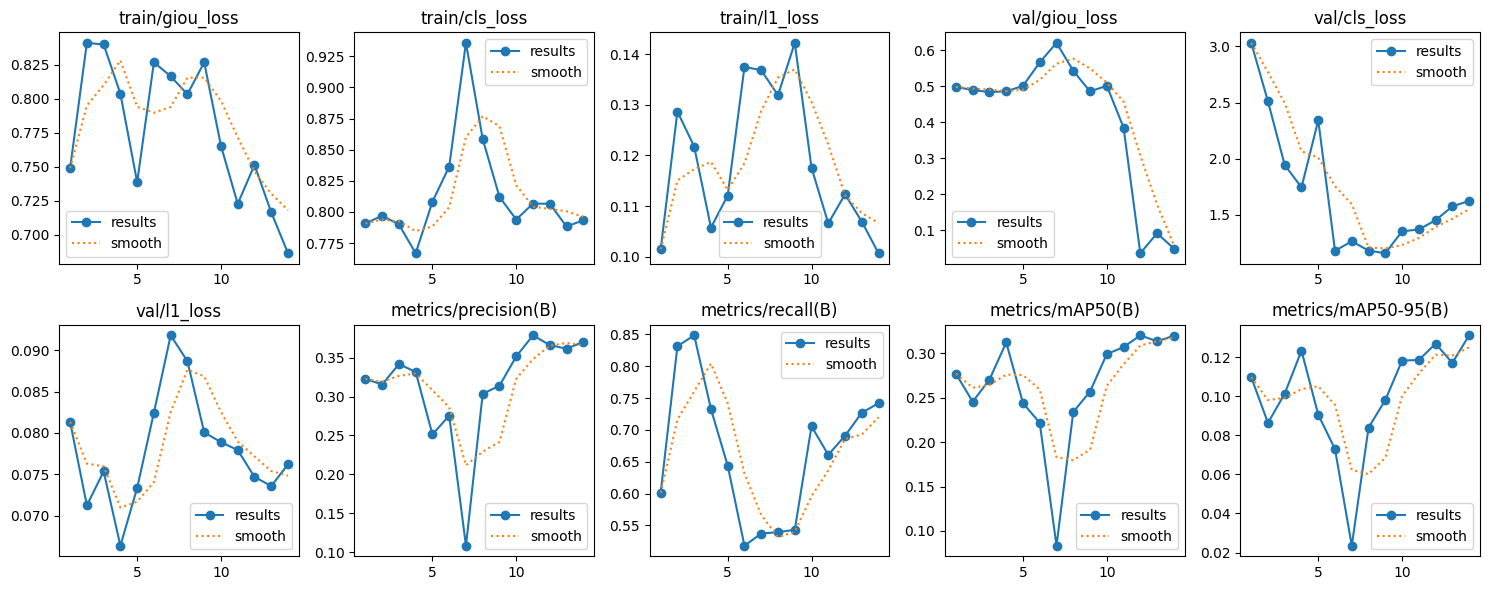

In [26]:
# Define metrics to plot
metrics = [
    "train/giou_loss", "train/cls_loss", "train/l1_loss",
    "val/giou_loss", "val/cls_loss", "val/l1_loss",
    "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"
]

epochs = df.index + 1  # Assuming each row represents an epoch

# Create subplot layout
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    if metric in df.columns:
        ax = axes[i]
        ax.plot(epochs, df[metric], marker="o", linestyle="-", label="results", color="tab:blue")

        # Compute simple moving average for smoothing
        smooth_window = 3
        smooth_values = df[metric].rolling(smooth_window, min_periods=1).mean()
        ax.plot(epochs, smooth_values, linestyle="dotted", label="smooth", color="tab:orange")

        ax.set_title(metric)
        ax.legend()

plt.tight_layout()
plt.show()

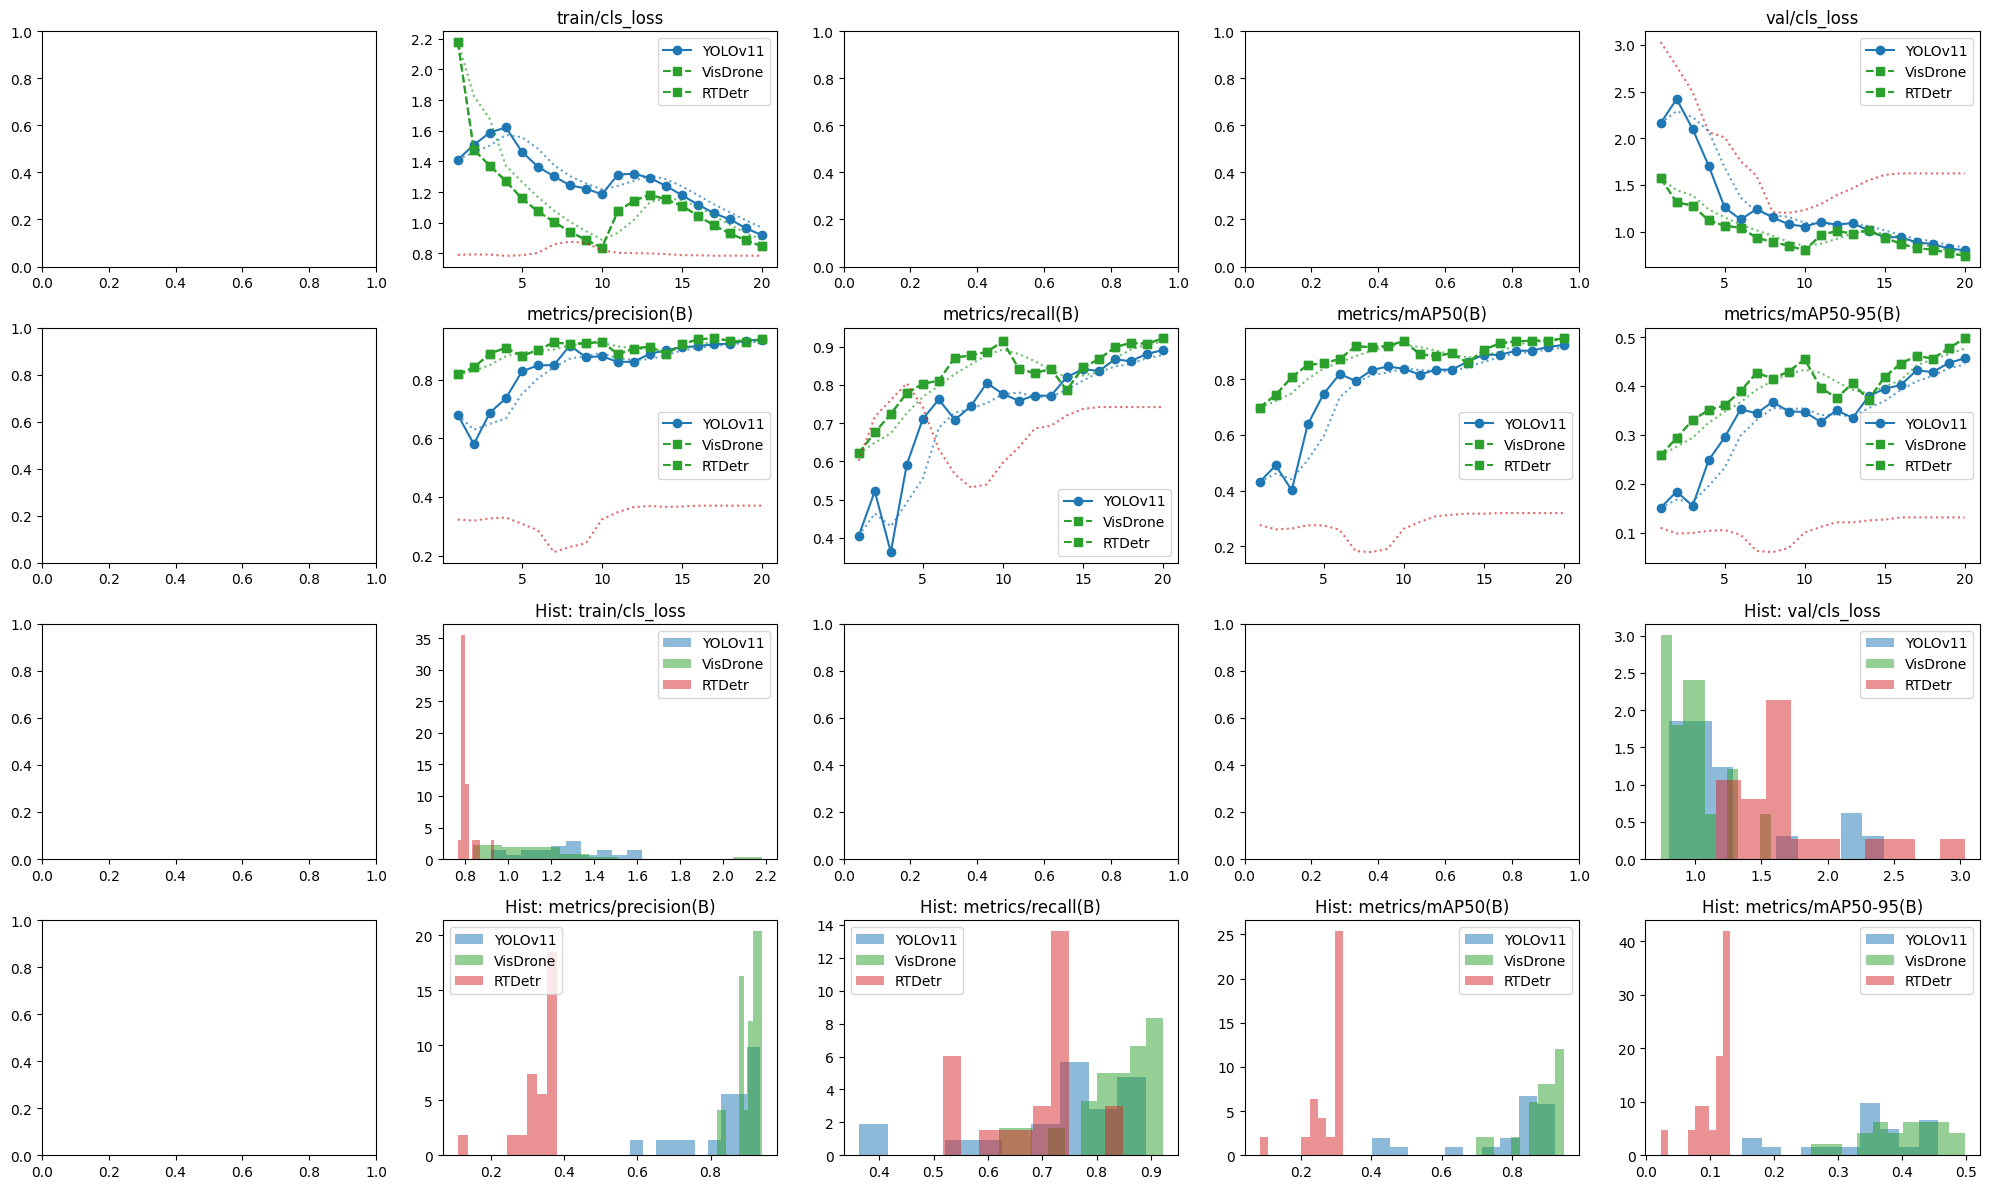

In [21]:
# Load CSV files
csv_path_1 = "/home/ezaborshchikov/hse_mc/hse_dl_project/results/yolo_results.csv"  # Update with your first CSV file path
csv_path_2 = "/home/ezaborshchikov/hse_mc/hse_dl_project/results/visdrone_results.csv"  # Update with your second CSV file path
csv_path_3 = "/home/ezaborshchikov/hse_mc/hse_dl_project/results/detr/results (1).csv"

df1 = pd.read_csv(csv_path_1)
df2 = pd.read_csv(csv_path_2)
df3 = pd.read_csv(csv_path_3)

# Define metrics to plot
metrics = [
    "train/box_loss", "train/cls_loss", "train/dfl_loss",
    "val/box_loss", "val/cls_loss", "val/dfl_loss",
    "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"
]

epochs = df1.index + 1  # Assuming each row represents an epoch

# Create subplot layout (2 rows: one for line plots, one for histograms)
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.ravel()

colors = ["tab:blue", "tab:green", "tab:red"]  # Colors for the two datasets

for i, metric in enumerate(metrics):
    if metric in df1.columns and metric in df2.columns and metric in df3.columns:
        ax_line = axes[i]
        ax_hist = axes[i + 10]  # Histogram plots below the line plots

        # Plot metrics for both datasets
        ax_line.plot(epochs, df1[metric], marker="o", linestyle="-", color=colors[0], label="YOLOv11")
        ax_line.plot(epochs, df2[metric], marker="s", linestyle="--", color=colors[1], label="VisDrone")
        ax_line.plot(epochs, df2[metric], marker="s", linestyle="--", color=colors[1], label="RTDetr")

        # Compute simple moving average for smoothing
        smooth_window = 3
        smooth1 = df1[metric].rolling(smooth_window, min_periods=1).mean()
        smooth2 = df2[metric].rolling(smooth_window, min_periods=1).mean()
        smooth3 = df3[metric].rolling(smooth_window, min_periods=1).mean()

        ax_line.plot(epochs, smooth1, linestyle="dotted", color=colors[0], alpha=0.7)
        ax_line.plot(epochs, smooth2, linestyle="dotted", color=colors[1], alpha=0.7)
        ax_line.plot(epochs, smooth3, linestyle="dotted", color=colors[2], alpha=0.7)

        ax_line.set_title(metric)
        ax_line.legend()

        # Histogram comparison
        ax_hist.hist(df1[metric].dropna(), bins=10, alpha=0.5, color=colors[0], label="YOLOv11", density=True)
        ax_hist.hist(df2[metric].dropna(), bins=10, alpha=0.5, color=colors[1], label="VisDrone", density=True)
        ax_hist.hist(df3[metric].dropna(), bins=10, alpha=0.5, color=colors[2], label="RTDetr", density=True)

        ax_hist.set_title(f"Hist: {metric}")
        ax_hist.legend()

plt.tight_layout()
plt.show()